# 911 Calls Capstone Project

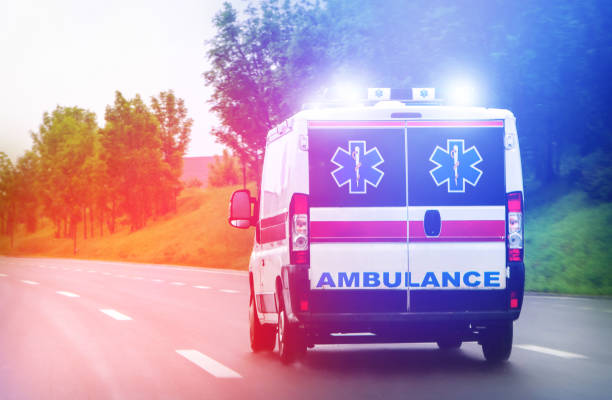

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our data analysis skills!

First some basic questions:

1. From where the calls come most?
2. Which are top townships for calls?
3. How many unique title?
4. What is the reason for most calls?


* `lat` : String variable, Latitude
* `lng`: String variable, Longitude
* `desc`: String variable, Description of the Emergency Call
* `zip`: String variable, Zipcode
* `title`: String variable, Title
* `timeStamp`: String variable, YYYY-MM-DD HH:MM:SS
* `twp`: String variable, Township
* `addr`: String variable, Address
* `e`: String variable, Dummy variable (always 1)

# 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# 2. Get the Data

In [4]:
data = pd.read_csv("data/911.csv")
column = ['latitude', 'longitude', 'description', 'zipcode', 'title', 'timestamp'
          , 'township', 'address', 'e']
data.columns = column
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.drop('e', axis=1, inplace=True)

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624239 entries, 0 to 624238
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   latitude     624239 non-null  float64
 1   longitude    624239 non-null  float64
 2   description  624239 non-null  object 
 3   zipcode      548027 non-null  float64
 4   title        624239 non-null  object 
 5   timestamp    624239 non-null  object 
 6   township     623970 non-null  object 
 7   address      624239 non-null  object 
dtypes: float64(3), object(5)
memory usage: 38.1+ MB


- Data have float, integer, and object values. `timestamp` is a date.
- Some variable columns have null/missing values.

The `describe()` function in pandas is very handy in getting various summary statistics.This function returns the `count`, `mean`, `standard deviation`, `minimum` and `maximum` values and the quantiles of the data.

In [7]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,latitude,longitude,zipcode
count,624239.00,624239.00,548027.00
mean,40.16,-75.30,19235.78
std,0.21,1.59,298.18
min,0.00,-119.70,1104.00
25%,40.10,-75.39,19038.00
50%,40.14,-75.30,19401.00
75%,40.23,-75.21,19446.00
max,51.34,87.85,77316.00


- We can compare the `mean` with the `median (50%)`.
- We can compare the `75%` with the `100%` to detect outliers.

In [8]:
data.isna().sum()

latitude           0
longitude          0
description        0
zipcode        76212
title              0
timestamp          0
township         269
address            0
dtype: int64

- `zip`: has 52129 missing values (Zipcode)
- `twp`: has 159 missing values (Township)

## "desc" : Description of the Emergency Call

In [9]:
data['station_num'] = data.description.str.split('Station', expand=True)[1].str.split(';', expand=True)[0]
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329


In [10]:
data.station_num.str.replace(':', '').value_counts()[:10]

 308A    23530
 329     20468
 313     19179
 381     14984
 345     13480
 308     13033
 351     11964
 317     11802
 345B    11350
 382     10481
Name: station_num, dtype: int64

<BarContainer object of 10 artists>

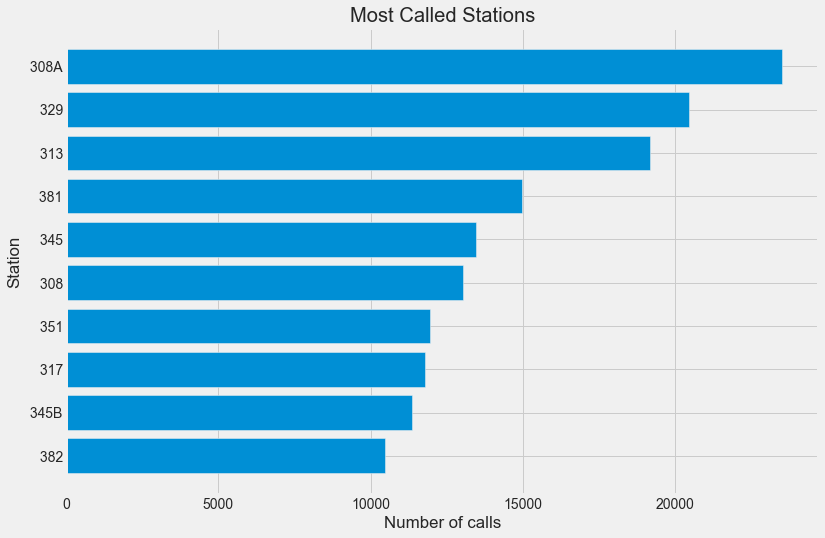

In [11]:
df = data.station_num.str.replace(':', '').value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most Called Stations")
plt.ylabel("Station")
plt.xlabel("Number of calls")

plt.barh(x, y)

- The `description` feature have a lot of important information (township, address, timestamp ...) but the station number is missing for the most of the emergency calls.
- Most of the calls come from stations `308A`, `329`, `313`, `381`, and `317`

## "Zipcode"

In [12]:
print(data.zipcode.nunique())
print(data.zipcode.unique())

195
[19525. 19446. 19401.    nan 19044. 19426. 19438. 19462. 19428. 19040.
 19027. 18936. 18974. 19031. 19403. 19422. 19085. 18964. 19038. 19406.
 19468. 19010. 19095. 19464. 19444. 19041. 19440. 19405. 19002. 19096.
 19454. 19465. 19004. 19066. 19072. 18041. 19046. 19090. 19012. 19025.
 19473. 18073. 18969. 18074. 19460. 19001. 18054. 19009. 19006. 19035.
 19150. 19075. 19034. 19151. 19453. 19003. 18914. 19512. 18976. 19120.
 18915. 18076. 19477. 19087. 18966. 19131. 19128. 19083. 19053. 19475.
 18960. 19504. 18070. 19492. 18932. 19118. 18092. 19490. 19518. 18056.
 19119. 19107. 17752. 19111. 18927. 19435. 18951. 19472. 19503. 19126.
 19505. 19423. 19138. 36107. 18036. 19116. 19139. 19129. 19115. 19355.
 77316. 19457. 19082. 19127. 19443. 17555. 19520. 19063. 19020. 19404.
 19382. 19474. 19057. 19073. 19121. 18958. 19026. 19018. 19047. 19064.
 19602. 19486. 19348. 18051. 18049. 19333. 19144. 18101. 19607. 19450.
 19380. 17506.  8361. 18940. 18104.  7203. 19030.  8033. 19104. 17545.
  

In [13]:
data.zipcode.value_counts()

19401.00    42542
19464.00    41056
19403.00    32665
19446.00    30283
19406.00    21208
            ...  
19456.00        1
19457.00        1
18080.00        1
19543.00        1
8077.00         1
Name: zipcode, Length: 195, dtype: int64

**What are the top 5 zipcodes for 911 calls?**

In [14]:
data.zipcode.value_counts().head()

19401.00    42542
19464.00    41056
19403.00    32665
19446.00    30283
19406.00    21208
Name: zipcode, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [15]:
data.township.value_counts().head()

LOWER MERION    52609
ABINGTON        37613
NORRISTOWN      35020
UPPER MERION    34165
CHELTENHAM      28779
Name: township, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [16]:
data.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [17]:
data.title.nunique()

147

## Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are `EMS`, `Fire`, and `Traffic`. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [18]:
# data['Reason_category'] = data.title.apply(lambda title: title.split(': ')[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [19]:
data['Reason_category'] = data.title.str.split(':', expand=True)[0]
data['Reason'] = data.title.str.split(':', expand=True)[1].str.replace(' -', '')

In [20]:
print(data.Reason.value_counts())
print(data.Reason.nunique())

 VEHICLE ACCIDENT         177623
 DISABLED VEHICLE          45930
 FIRE ALARM                35871
 FALL VICTIM               32033
 RESPIRATORY EMERGENCY     31714
                           ...  
 HIT + RUN                     1
 PRISONER IN CUSTODY           1
 ANIMAL COMPLAINT              1
 FOOT PATROL                   1
 BARRICADED SUBJECT            1
Name: Reason, Length: 88, dtype: int64
88


In [21]:
print(data.Reason_category.value_counts())
print(data.Reason_category.nunique())

EMS        310876
Traffic    219985
Fire        93378
Name: Reason_category, dtype: int64
3


<BarContainer object of 10 artists>

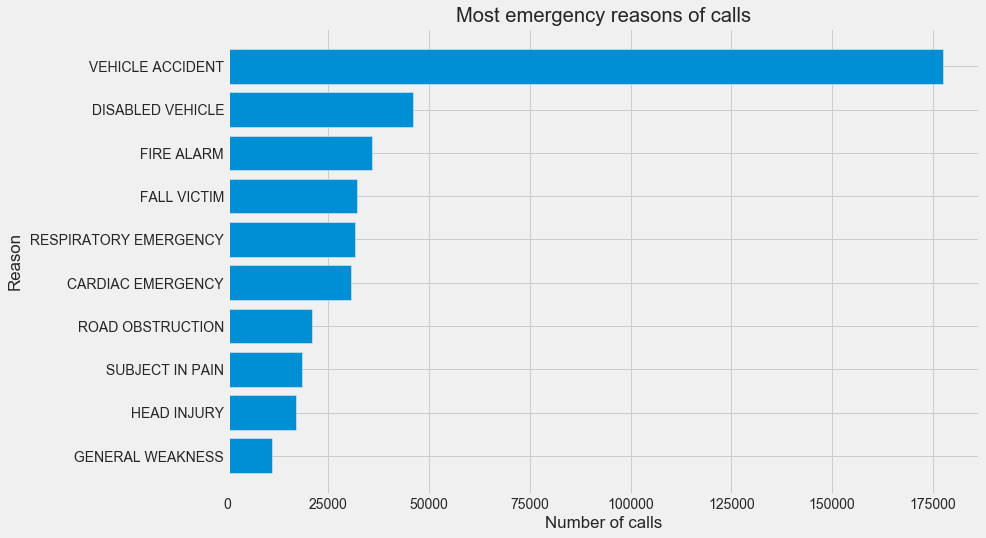

In [22]:
df = data.Reason.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(df.index)
y = list(df.values)
x.reverse()
y.reverse()

plt.title("Most emergency reasons of calls")
plt.ylabel("Reason")
plt.xlabel("Number of calls")

plt.barh(x, y)

**Now use seaborn to create a countplot of 911 calls by Reason.**

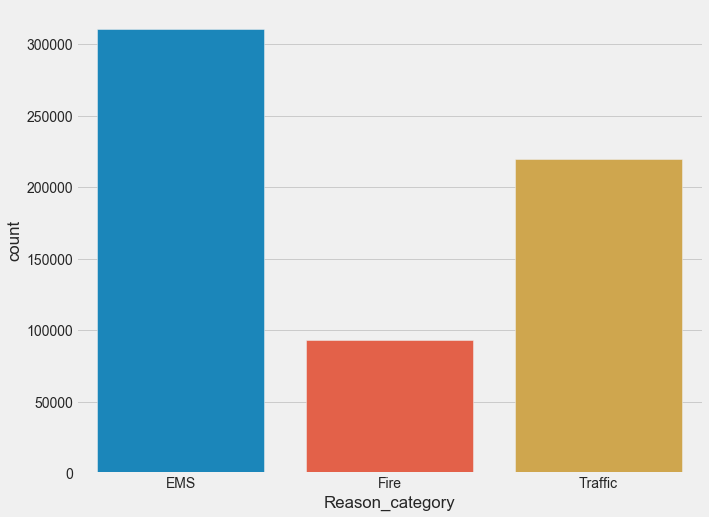

In [23]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Reason_category, data=data)

**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [24]:
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS


In [25]:
data['timestamp'] = pd.to_datetime(data.timestamp)

In [26]:
data.timestamp

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
624234   2020-03-31 08:14:51
624235   2020-03-31 08:12:05
624236   2020-03-31 08:35:16
624237   2020-03-31 08:42:59
624238   2020-03-31 08:44:32
Name: timestamp, Length: 624239, dtype: datetime64[ns]

**You can now grab specific attributes from a Datetime object by calling them. For example:**
- `time = df['timeStamp'].iloc[0]`
- `time.hour`

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [27]:
data['Hour'] = data.timestamp.dt.hour
data['Month'] = data.timestamp.dt.month
data['DayOfWeek'] = data.timestamp.dt.weekday

In [28]:
data.head()

,latitude,longitude,description,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,Month,DayOfWeek
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,17,12,3
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,17,12,3
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK,14,12,3
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,16,12,3
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,16,12,3


The `description` feature isn't usefull anymore

In [29]:
data.drop('description', axis=1, inplace=True)

In [30]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
data['DayOfWeek'] = data.DayOfWeek.map(dmap)
data.DayOfWeek.value_counts()

Fri    97039
Thu    92839
Wed    92724
Tue    92114
Mon    91029
Sat    84329
Sun    74165
Name: DayOfWeek, dtype: int64

**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

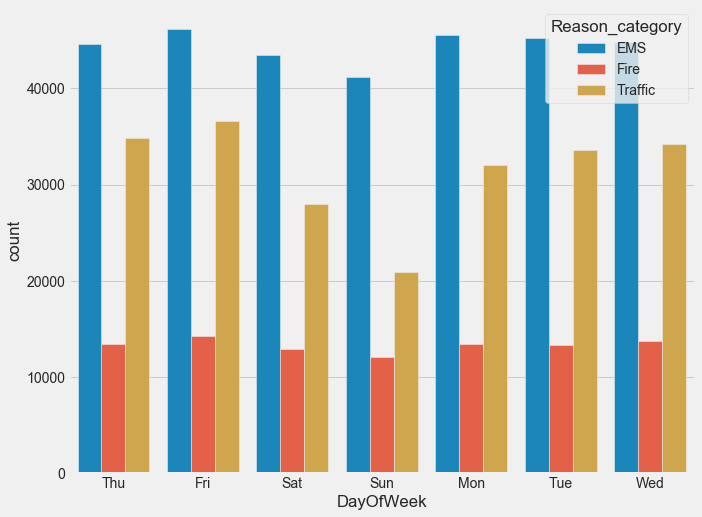

In [31]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.DayOfWeek, data=data, hue='Reason_category')

**Now do the same for Month:**

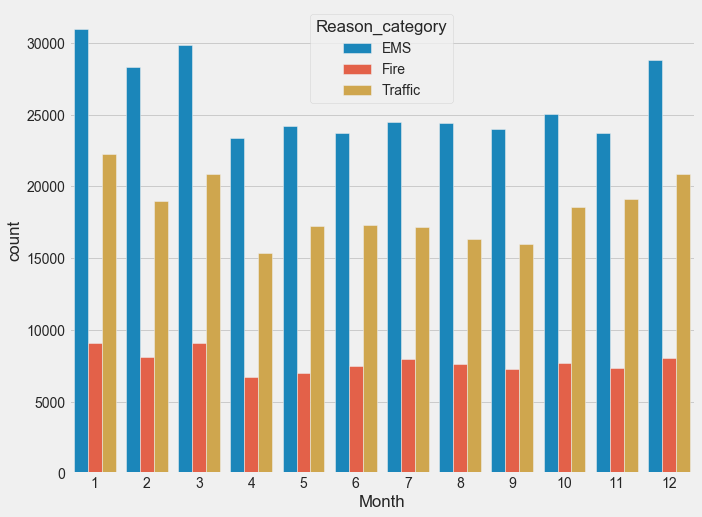

In [32]:
plt.figure(figsize=(10, 8))
sns.countplot(x=data.Month, data=data, hue='Reason_category')

**Did you notice something strange about the Plot?**

_____

You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [33]:
byMonth = data.groupby('Month').count()
byMonth

,latitude,longitude,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,62336,62336,55294,62336,62336,62312,62336,40057,62336,62336,62336,62336
2,55427,55427,48922,55427,55427,55405,55427,36421,55427,55427,55427,55427
3,59831,59831,53064,59831,59831,59805,59831,38963,59831,59831,59831,59831
4,45428,45428,39810,45428,45428,45414,45428,30090,45428,45428,45428,45428
5,48467,48467,42257,48467,48467,48443,48467,31229,48467,48467,48467,48467
6,48493,48493,42223,48493,48493,48466,48493,31221,48493,48493,48493,48493
7,49571,49571,43405,49571,49571,49550,49571,32425,49571,49571,49571,49571
8,48359,48359,42311,48359,48359,48335,48359,32008,48359,48359,48359,48359
9,47213,47213,41289,47213,47213,47196,47213,31240,47213,47213,47213,47213


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

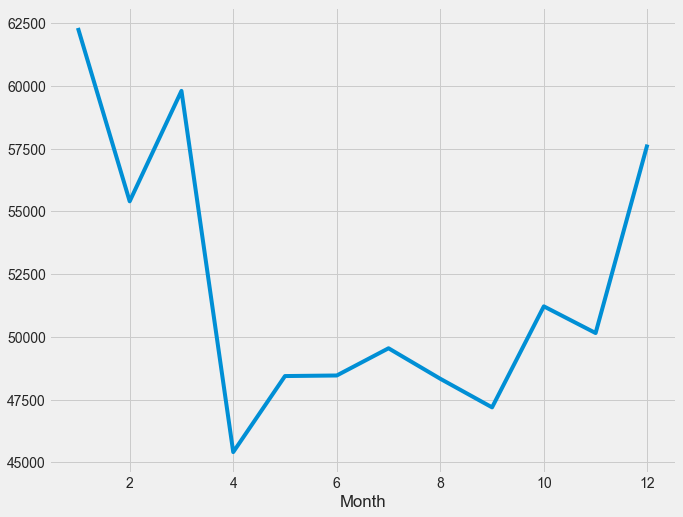

In [34]:
byMonth.township.plot(figsize=(10, 8))

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

<Figure size 864x576 with 0 Axes>

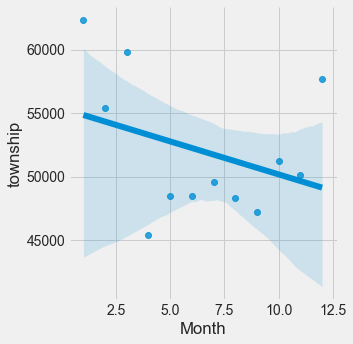

In [35]:
plt.figure(figsize=(12, 8))
sns.lmplot(x='Month',y='township',data=byMonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [36]:
data['Date'] = data.timestamp.dt.date
data.Date

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
624234    2020-03-31
624235    2020-03-31
624236    2020-03-31
624237    2020-03-31
624238    2020-03-31
Name: Date, Length: 624239, dtype: object

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [37]:
byDate = data.groupby("Date").count()
byDate.head()

,latitude,longitude,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,
2015-12-10,114,114,100,114,114,114,114,73,114,114,114,114,114
2015-12-11,391,391,332,391,391,391,391,254,391,391,391,391,391
2015-12-12,402,402,334,402,402,402,402,257,402,402,402,402,402
2015-12-13,316,316,279,316,316,316,316,241,316,316,316,316,316
2015-12-14,444,444,386,444,444,443,444,260,444,444,444,444,444


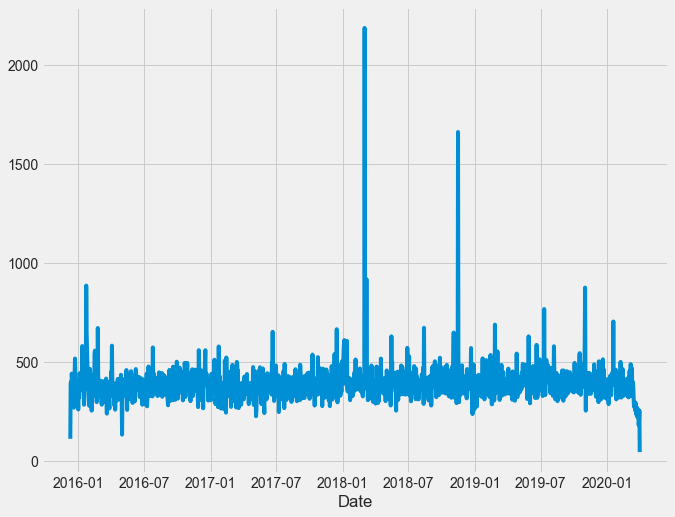

In [38]:
byDate.township.plot(figsize=(10, 8))

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

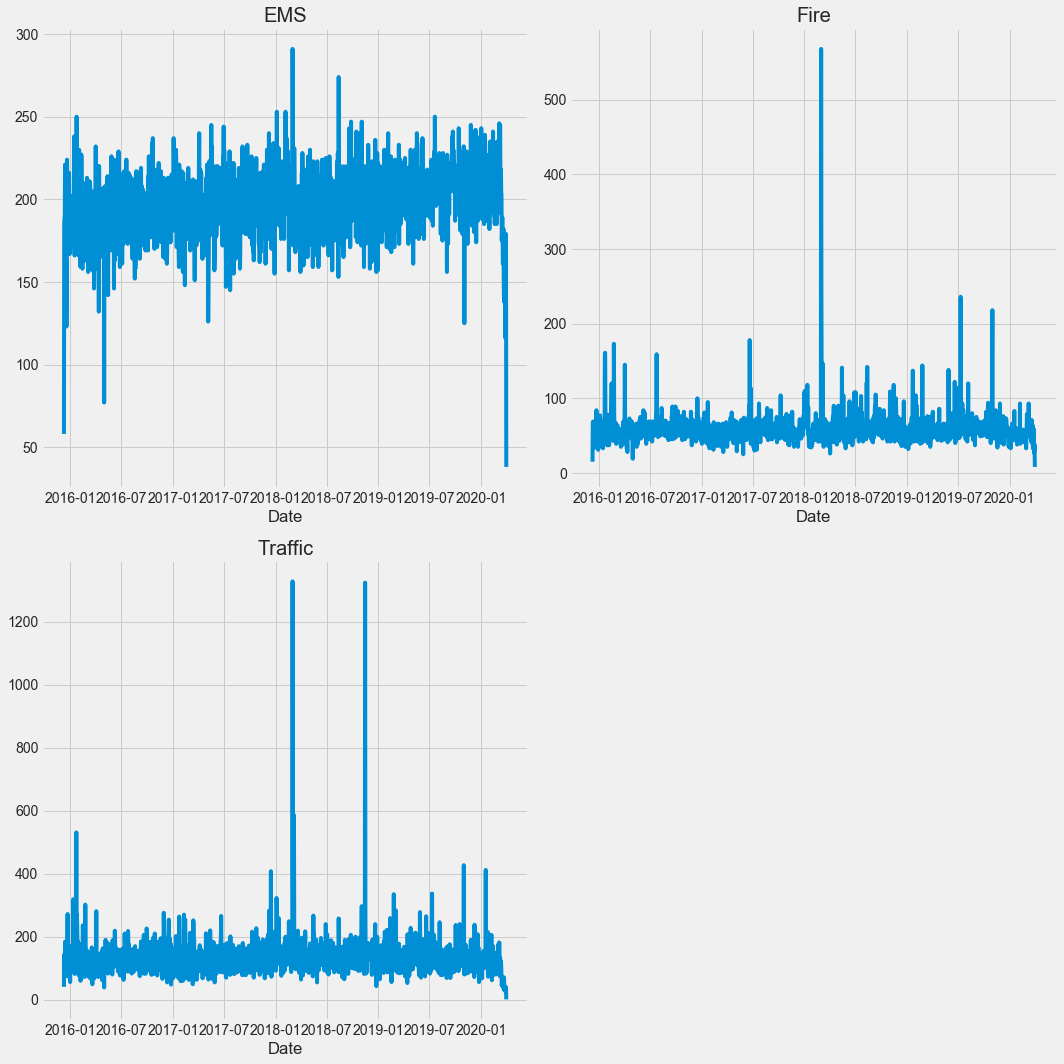

In [39]:
plt.figure(figsize=(15, 15))

for i, reason in enumerate(data.Reason_category.unique(), 1):
    plt.subplot(2, 2, i)
    data[data['Reason_category']==reason].groupby('Date').count()['township'].plot()
    plt.title(reason)
    plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [40]:
dayHour = data.groupby(by=['DayOfWeek','Hour']).count()['Reason_category'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1850,1519,1356,1231,1228,1540,2542,3962,4791,4986,...,6024,6628,6688,6754,5340,4761,4094,3651,3219,2681
Mon,1766,1460,1279,1187,1256,1732,2555,4250,5281,5436,...,5318,5826,5993,6085,5142,4221,3546,3045,2484,1941
Sat,2294,1939,1794,1498,1361,1478,1767,2378,3277,4083,...,5106,4870,4891,4907,4706,4486,3901,3660,3030,2794
Sun,2289,2024,1829,1519,1388,1381,1643,2268,2843,3523,...,4426,4205,4262,4247,4133,3918,3507,2946,2450,2175
Thu,1611,1309,1324,1159,1183,1665,2677,4264,5085,5097,...,5671,6100,5989,6589,5208,4414,3843,3285,2666,2208


**Now create a HeatMap using this new DataFrame.**

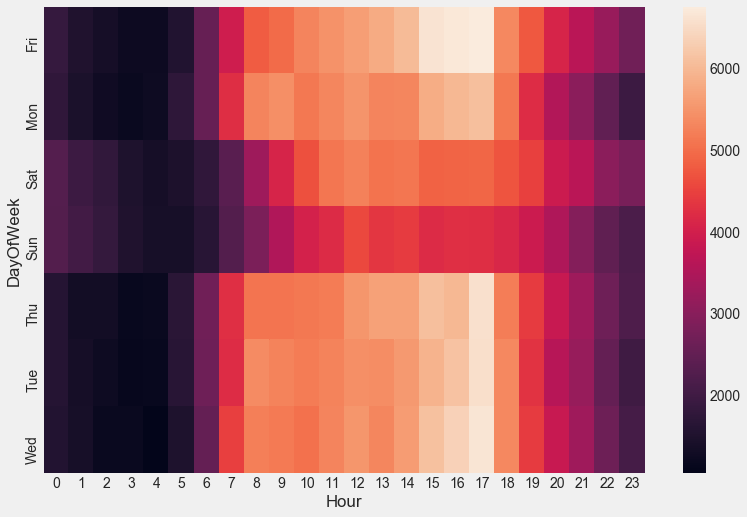

In [41]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayHour)

**Now create a clustermap using this DataFrame.**

<Figure size 864x576 with 0 Axes>

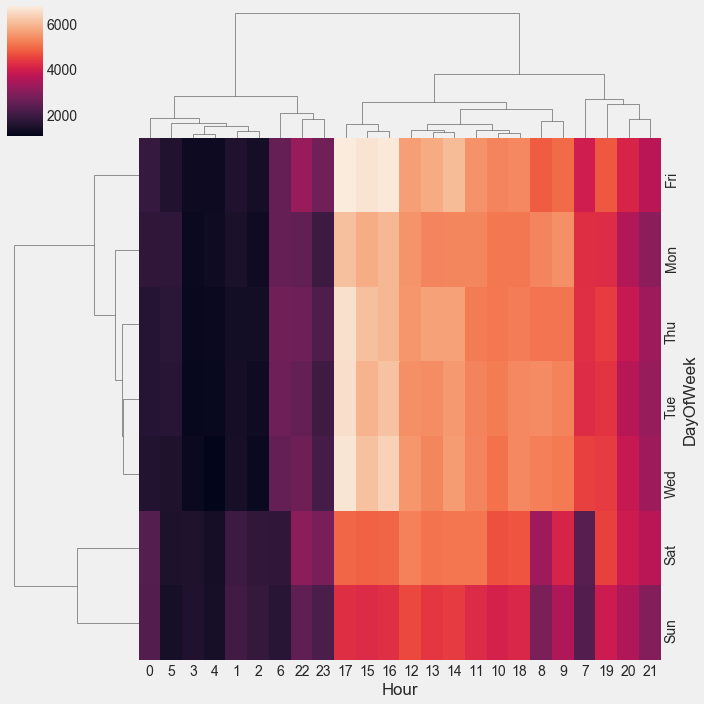

In [42]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayHour)

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [43]:
dayMonth = data.groupby(by=['DayOfWeek','Month']).count()['Reason_category'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
DayOfWeek,,,,,,,,,,,,
Fri,9309,8255,10941,6922,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,7170,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,6530,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,5911,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,6147,7524,7850,6964,7508,6954,7482,8358,8151


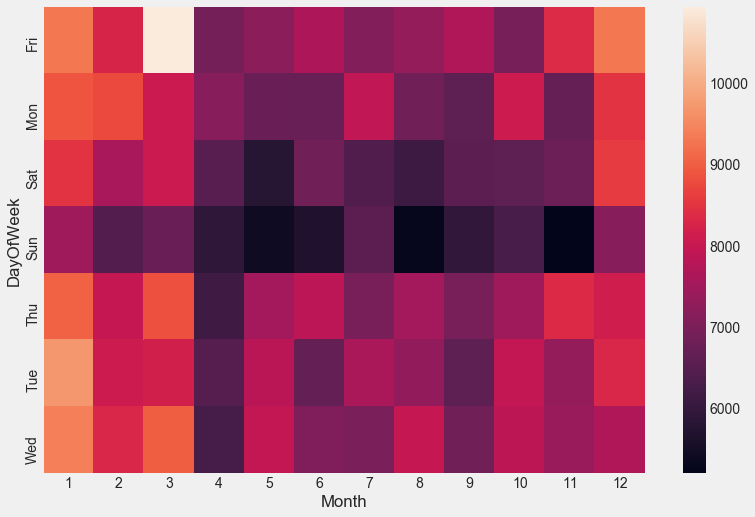

In [44]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayMonth)

<Figure size 864x576 with 0 Axes>

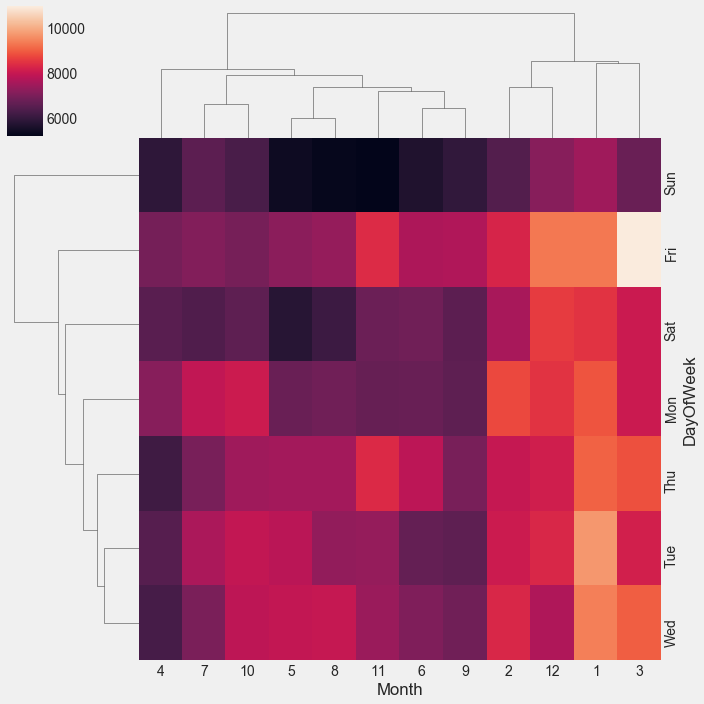

In [45]:
plt.figure(figsize=(12, 8))
sns.clustermap(dayMonth)

## Longitude and Latitude

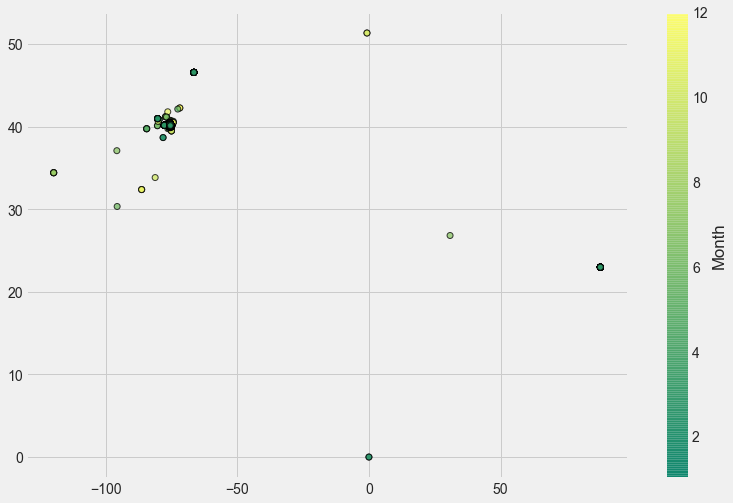

In [46]:
plt.figure(figsize=(12, 8))
plt.scatter(data.longitude, data.latitude, c=data.Month, cmap='summer', 
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Month')

In [47]:
data.head()

,latitude,longitude,zipcode,title,timestamp,township,address,station_num,Reason_category,Reason,Hour,Month,DayOfWeek,Date
0,40.30,-75.58,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,332,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10
1,40.26,-75.26,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,345,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10
2,40.12,-75.35,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,:STA27,Fire,GAS-ODOR/LEAK,14,12,Thu,2015-12-10
3,40.12,-75.34,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,308A,EMS,CARDIAC EMERGENCY,16,12,Thu,2015-12-10
4,40.25,-75.60,nan,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,329,EMS,DIZZINESS,16,12,Thu,2015-12-10
